In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/^NSEI.csv')

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-03,8510.650391,8563.950195,8508.099609,8543.049805,8543.049805,156700.0
1,2015-08-04,8564.099609,8565.150391,8448.250000,8516.900391,8516.900391,187400.0
2,2015-08-05,8547.450195,8591.849609,8545.849609,8567.950195,8567.950195,132800.0
3,2015-08-06,8585.799805,8606.299805,8551.500000,8588.650391,8588.650391,134900.0
4,2015-08-07,8580.799805,8595.950195,8552.700195,8564.599609,8564.599609,143700.0


In [ ]:
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
rcParams['figure.figsize']=20,10 
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data['Date']=pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index=data['Date']

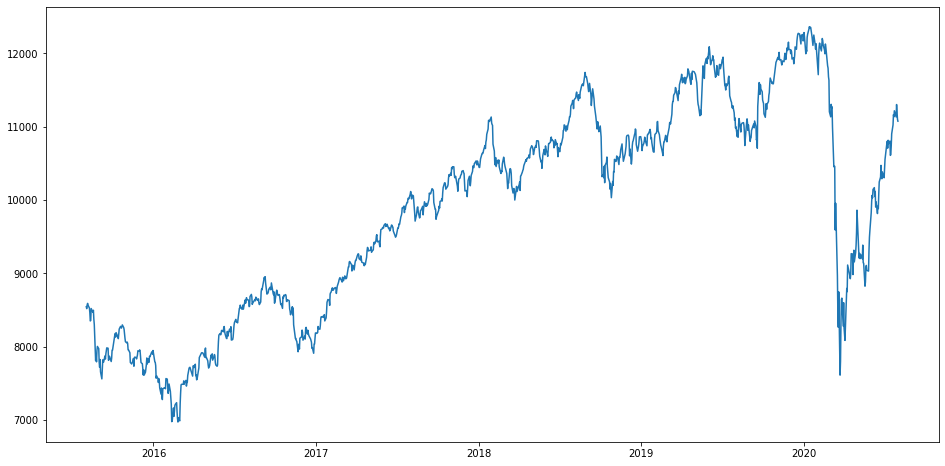

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])

In [ ]:
df=data.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])


for i in range(0,len(data)):
  new_data['Date'][i]=df['Date'][i]
  new_data['Close'][i]=df['Close'][i]

In [ ]:
new_data.head()

,Date,Close
0,2015-08-03 00:00:00,8543.05
1,2015-08-04 00:00:00,8516.9
2,2015-08-05 00:00:00,8567.95
3,2015-08-06 00:00:00,8588.65
4,2015-08-07 00:00:00,8564.6


In [ ]:
new_data.shape

(1224, 2)

In [ ]:
train=new_data[:1200]
valid=new_data[1200:]

In [ ]:
new_data.shape, train.shape, valid.shape

((1224, 2), (1200, 2), (24, 2))

In [ ]:
train['Date'].max(), train['Date'].min(), valid['Date'].max(),valid['Date'].min()

(Timestamp('2020-06-29 00:00:00'),
 Timestamp('2015-08-03 00:00:00'),
 Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-06-30 00:00:00'))

In [ ]:
#make predictions
preds = []
for i in range(1,25):
    a = train['Close'][len(train)-24+i:].sum() + sum(preds)
    b = a/24
    preds.append(b)

In [ ]:
rmse=np.sqrt(np.mean(np.power(np.array(valid['Close']-preds),2)))
rmse

1495.163925468423

In [ ]:
valid['Predictions']=preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


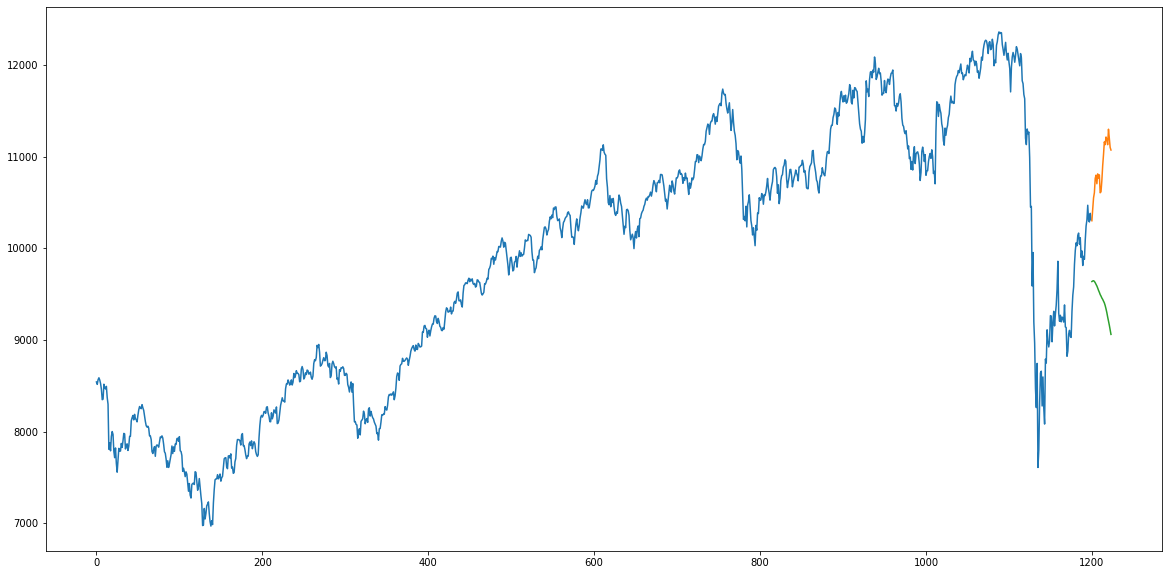

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
!python -m pip install fastai

In [ ]:
import fastai

In [ ]:
import sys
print (sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
def add_datepart(df, fldname, drop=True, time=False, errors="raise"):	
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [ ]:
import re

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [ ]:
new_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,8543.05,2015,8,32,3,0,215,False,False,False,False,False,False
1,8516.9,2015,8,32,4,1,216,False,False,False,False,False,False
2,8567.95,2015,8,32,5,2,217,False,False,False,False,False,False
3,8588.65,2015,8,32,6,3,218,False,False,False,False,False,False
4,8564.6,2015,8,32,7,4,219,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,11131.8,2020,7,31,27,0,209,False,False,False,False,False,False
1220,11300.5,2020,7,31,28,1,210,False,False,False,False,False,False
1221,11202.8,2020,7,31,29,2,211,False,False,False,False,False,False
1222,11102.2,2020,7,31,30,3,212,False,False,False,False,False,False


In [ ]:
new_data['mon_fri']=0
for i in range(0, len(new_data)):
  if ( new_data['Dayofweek'][i]==0 or new_data['Dayofweek'][i]==4):
    new_data['mon_fri'][i]=1
  else:
    new_data['mon_fri'][i]=0
    
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_data['is_thursday']=0
for i in range(0,len(new_data)):
    if(new_data['Dayofweek'][i]==3):
        new_data['is_thursday'][i]=1
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X_train=new_data[:1200]
y_train=X_train['Close']
X_train=X_train.drop('Close',axis=1)


X_test=new_data[1200:]
y_test=X_test['Close']
X_test=X_test.drop('Close',axis=1)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1200, 14), (1200,), (24, 14), (24,))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [ ]:
mse=np.sqrt(np.mean(np.power(np.array(np.array(y_test)-np.array(preds)),2)))

In [ ]:
mse

994.5955501913069

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


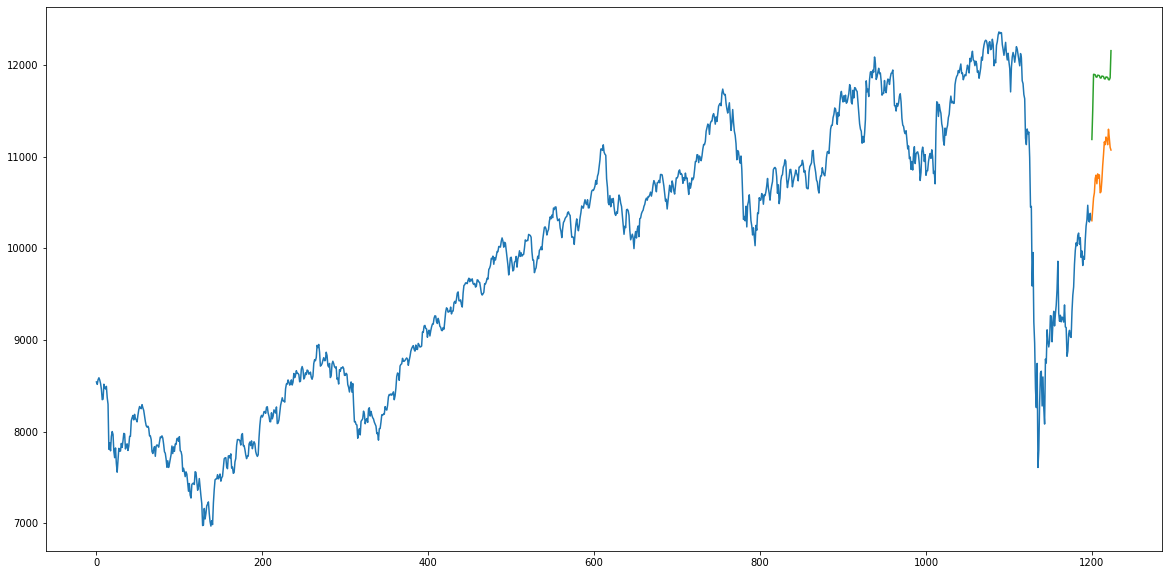

In [ ]:
train=new_data[:1200]
valid=new_data[1200:]

valid['predictions']=preds

valid.index=new_data[1200:].index
train.index=new_data[:1200].index
#plt.figure(figsize=(10,20))
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.show()


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)
X_test_scaled=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test_scaled)



In [ ]:
parameters={'n_neighbors':[2,3,4,5,6,7,8,9]}
knn=neighbors.KNeighborsRegressor()
model=GridSearchCV(knn,parameters,cv=5)

In [ ]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
preds=model.predict(X_test)

In [ ]:
mse=np.sqrt(np.mean(np.power(np.array(np.array(preds)-np.array(y_test)),2)))

In [ ]:
mse

2687.732356711224

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


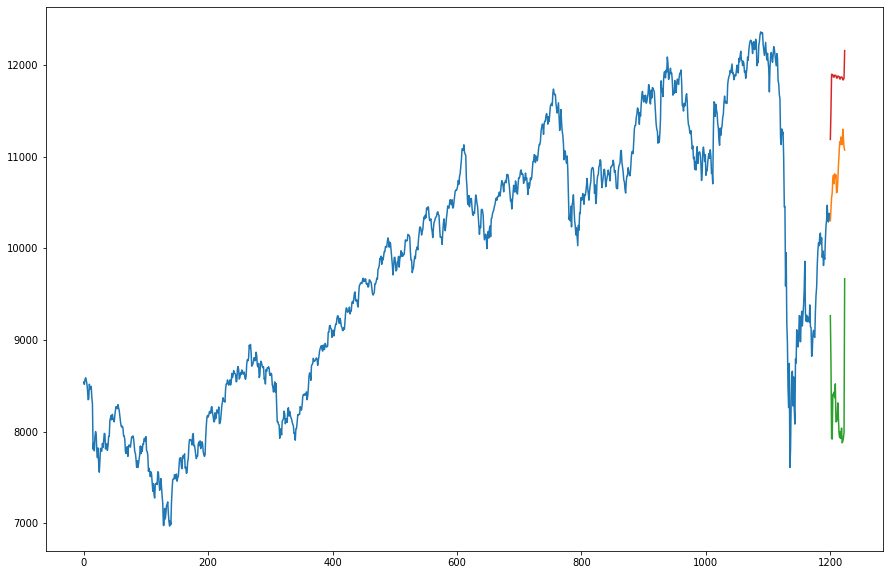

In [ ]:
valid['knn_preds']=preds

plt.figure(figsize=(15,10))
plt.plot(train['Close'])
plt.plot(valid[['Close','knn_preds','predictions']])
plt.show()




In [ ]:
!pip install pyramid-arima
from pyramid.arima import auto_arima

     |████████████████████████████████| 604kB 6.1MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [ ]:
#!pip uninstall pyramid
#!pip uninstall pyramid-arima

In [ ]:




training=train['Close']
validation=valid['Close']

training=training.fillna(training.mean())


model=auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                 d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)






Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14584.978, BIC=14610.374, Fit time=6.776 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15242.585, BIC=15252.743, Fit time=0.099 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15013.761, BIC=15034.077, Fit time=4.837 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14580.949, BIC=14601.265, Fit time=6.165 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14575.015, BIC=14600.411, Fit time=9.153 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=15013.779, BIC=15034.095, Fit time=4.487 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14572.404, BIC=14602.879, Fit time=45.012 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14587.258, BIC=14622.813, Fit time=40.814 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=14571.804, BIC=14597.200, Fit time=18.361 seconds
Fit ARI

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [ ]:
preds=model.predict(n_periods=24)

preds=pd.DataFrame(preds,index=valid.index, columns=['predictions'])

In [ ]:
mse= np.sqrt(np.mean(np.power(np.array(valid['Close'])- np.array(preds['predictions']),2)))

In [ ]:
mse

640.9719618240878

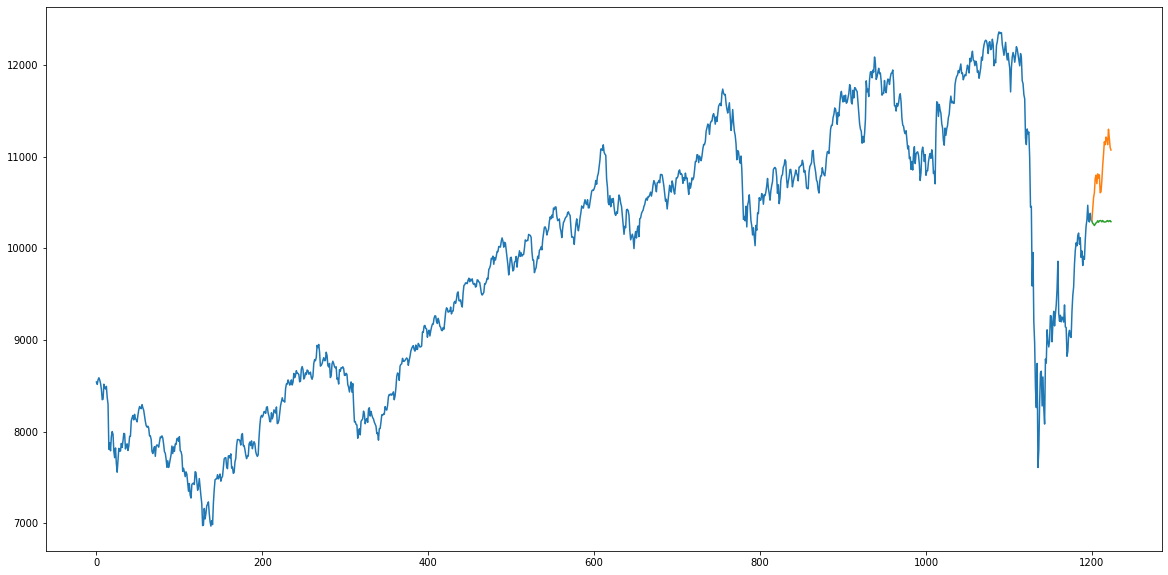

In [ ]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(preds['predictions'])

In [ ]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,is_thursday
0,8543.05,2015,8,32,3,0,215,False,False,False,False,False,False,1,0
1,8516.9,2015,8,32,4,1,216,False,False,False,False,False,False,0,0
2,8567.95,2015,8,32,5,2,217,False,False,False,False,False,False,0,0
3,8588.65,2015,8,32,6,3,218,False,False,False,False,False,False,0,1
4,8564.6,2015,8,32,7,4,219,False,False,False,False,False,False,1,0


In [ ]:
from fbprophet import Prophet

In [ ]:
new_data.columns

Index(['Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri', 'is_thursday'],
      dtype='object')

In [ ]:
prophet_data=pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
for i in range(0, len(df)):
  prophet_data['Date'][i]=df['Date'][i]
  prophet_data['Close'][i]=df['Close'][i]
  
  

In [ ]:
prophet_data['Date']=pd.to_datetime(prophet_data.Date,format='%Y-%m-%d')

In [ ]:
prophet_data.index=prophet_data['Date']

In [ ]:
prophet_data.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [ ]:
train_data=prophet_data[:1200]
validation_data=prophet_data[1200:]

In [ ]:
model=Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
preds=model.predict(validation_data)

In [ ]:
preds=model.make_future_dataframe(periods=len(validation_data))
forecast=model.predict(preds)


In [ ]:
predictions=forecast['yhat'][1200:]

In [ ]:
predictions.values

array([10086.02120353, 10071.25169125, 10087.20104984, 10076.23446675,
       10424.91129526, 10423.51668053, 10080.34225013, 10072.90047529,
       10061.32038317, 10080.37964854, 10072.42877579, 10424.01478875,
       10425.41195592, 10084.90159939, 10079.98563346, 10070.78154972,
       10092.05390881, 10086.13807621, 10439.5636394 , 10442.58504721,
       10103.46152529, 10099.6709123 , 10091.30512473, 10113.10229488])

In [ ]:
mse=np.sqrt(np.mean(np.power(np.array(validation_data['y'])-np.array(predictions),2)))

In [ ]:
mse

765.2849418863609

In [ ]:
validation_data.columns

Index(['ds', 'y'], dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



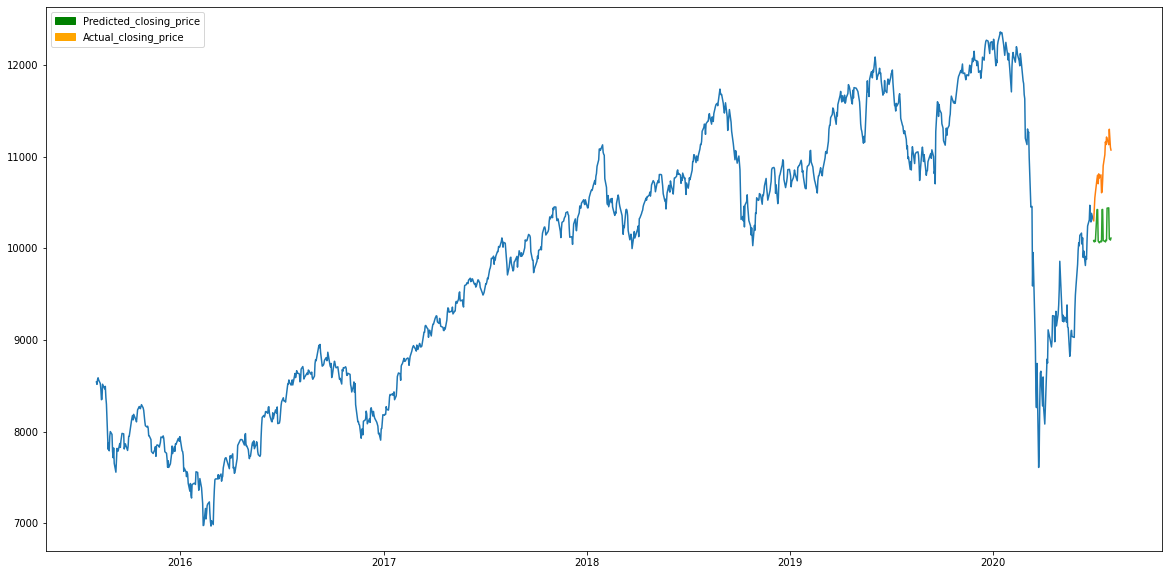

In [ ]:
blue_patch = mpatches.Patch(color='green', label='Predicted_closing_price')
orange_patch = mpatches.Patch(color='orange', label='Actual_closing_price')
plt.legend(handles=[blue_patch,orange_patch])

validation_data['Predictions']=0
validation_data['Predictions']=predictions.values

plt.plot(train_data['y'])
plt.plot(validation_data[['y','Predictions']])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
LSTM_data=pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
for i in range(0, len(df)):
  LSTM_data['Date'][i]=df['Date'][i]
  LSTM_data['Close'][i]=df['Close'][i]

In [ ]:
LSTM_data.index=LSTM_data['Date']

In [ ]:
LSTM_data.drop('Date',axis=1,inplace=True)

In [ ]:
LSTM_data.shape

(1224, 1)

In [ ]:
LSTM_data=LSTM_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
#creating train and test sets
dataset = LSTM_data.values

train = dataset[0:1200,:]
valid = dataset[1200:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

1170/1170 [==============================] - 12s 10ms/step - loss: 0.0053


In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = LSTM_data[len(LSTM_data) - len(valid) -30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
inputs

array([[0.34361148],
       [0.35396992],
       [0.38873636],
       [0.39609956],
       [0.38367306],
       [0.38178122],
       [0.43480725],
       [0.46729225],
       [0.48402171],
       [0.52961968],
       [0.55798722],
       [0.57327928],
       [0.56726073],
       [0.58822829],
       [0.59292065],
       [0.57051588],
       [0.58340606],
       [0.54368753],
       [0.55683745],
       [0.52731054],
       [0.54591317],
       [0.53982055],
       [0.57886204],
       [0.60719262],
       [0.619582  ],
       [0.64922011],
       [0.61848765],
       [0.61544605],
       [0.63289873],
       [0.6198046 ],
       [0.61789411],
       [0.64162507],
       [0.6641876 ],
       [0.67450891],
       [0.70349806],
       [0.71017499],
       [0.69275926],
       [0.71273444],
       [0.70431402],
       [0.71074064],
       [0.67450891],
       [0.67652137],
       [0.69910238],
       [0.7291022 ],
       [0.75145136],
       [0.77742644],
       [0.77192717],
       [0.787

In [ ]:
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

223.72897241737132

In [ ]:
valid

array([[10302.099609],
       [10430.049805],
       [10551.700195],
       [10607.349609],
       [10763.650391],
       [10799.650391],
       [10705.75],
       [10813.450195],
       [10768.049805],
       [10802.700195],
       [10607.349609],
       [10618.200195],
       [10739.950195],
       [10901.700195],
       [11022.200195],
       [11162.25],
       [11132.599609],
       [11215.450195],
       [11194.150391],
       [11131.799805],
       [11300.549805],
       [11202.849609],
       [11102.150391],
       [11073.450195]], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



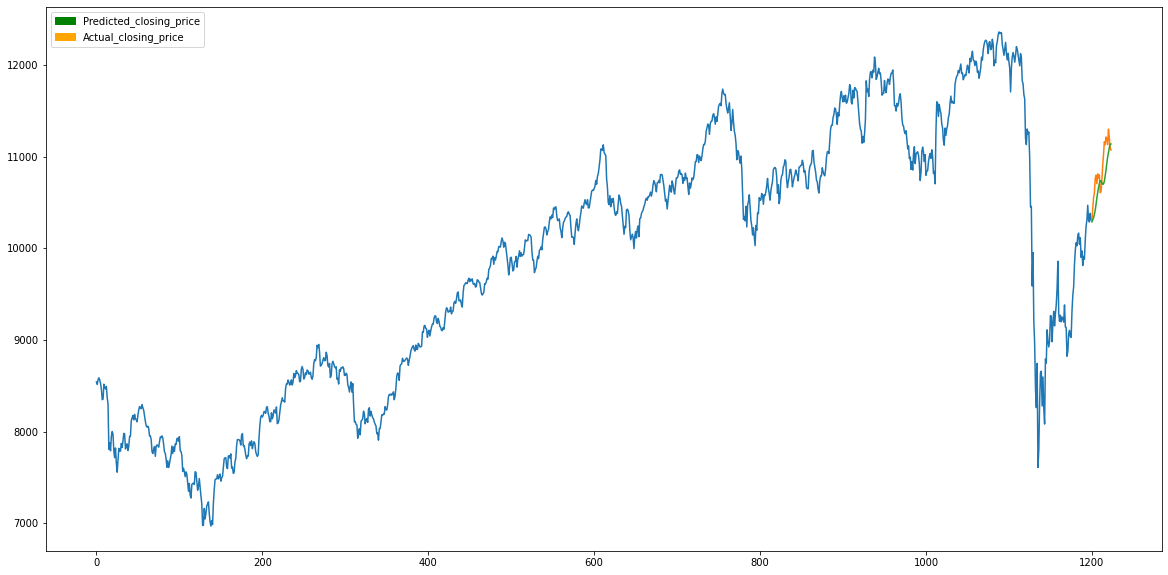

In [ ]:
import matplotlib.patches as mpatches
#for plotting
train = new_data[:1200]
valid = new_data[1200:]

blue_patch = mpatches.Patch(color='green', label='Predicted_closing_price')
orange_patch = mpatches.Patch(color='orange', label='Actual_closing_price')
plt.legend(handles=[blue_patch,orange_patch])
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()
